<a href="https://colab.research.google.com/github/Ddannia/Cleantech/blob/main/V3_Cleantech_patent_stage1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleantech Patent Data
Stage 1: Enhanced Data Cleaning, Preprocessing, and Exploratory



This notebook is divided into the following chapters:

1.	Setup and Data Loading: Import JSON file into datafram using pandas.read_json function.
2.	Preprocessing:
  *   Initial inspection using head(), info(), and describe()
  *   Inspect columns and data types
  *   Summary statistics for numeric columns
  *   Missings analysis
  *   Duplicates

3.	EDA
4. Topic Modelling


## Setup and Load Data

### Setup

In [ ]:
#connect to Google Drive folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#navigate to the folder with the datasets
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


### Import Libraries

In [ ]:
import nltk
import spacy
import pandas as pd
import numpy as np
# import pandas_profiling as prof
from pandas.plotting import scatter_matrix

import string
import re
import nltk
import spacy

from pathlib import Path
from textblob import TextBlob

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go

import plotly.graph_objs as go
from plotly.offline import iplot
from IPython.core.interactiveshell import InteractiveShell

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 30
from wordcloud import WordCloud


### Load Data

In [ ]:
# reading JSON
data_full = pd.read_json('CleanTech_22-24_updated.json', lines=True)

In [ ]:
data = data_full.copy()

## Preprocessing

In this section, the patent dataset is inspected for key attributes and data quality. Initial steps include:
  *   First inspection using head(), info(), and describe()
  *   Inspect columns and data types
  *   Summary statistics for numeric columns
  *   Missings analysis
  *   Duplicates


### Initial Inspection

In [ ]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406857 entries, 0 to 406856
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   publication_number  406857 non-null  object
 1   application_number  406857 non-null  object
 2   country_code        406857 non-null  object
 3   title               406857 non-null  object
 4   abstract            406857 non-null  object
 5   publication_date    406857 non-null  int64 
 6   inventor            406857 non-null  object
 7   cpc_code            406857 non-null  object
dtypes: int64(1), object(7)
memory usage: 24.8+ MB


,publication_number,application_number,country_code,title,abstract,publication_date,inventor,cpc_code
0,CN-117138249-A,CN-202311356270-A,CN,一种石墨烯光疗面罩,"The application provides a graphene phototherapy mask, and relates to the technical field of pho...",20231201,"[LI HAITAO, CAO WENQIANG]",A61N2005/0654
1,CN-117151396-A,CN-202311109834-A,CN,"Distributed economic scheduling method for wind, solar, biogas and hydrogen multi-energy multi-m...","The invention discloses a distributed economic dispatching method of a wind, solar and methane h...",20231201,"[HU PENGFEI, LI ZIMENG]",G06Q50/06
2,CN-117141530-A,CN-202310980795-A,CN,氢能源动力轨道车辆组,"The invention discloses a hydrogen energy power rail vehicle group, which comprises a power vehi...",20231201,"[XIE BO, ZHANG SHUIQING, ZHOU FEI, LIU YONG, Zhou Houyi]",Y02T90/40
3,CN-117141244-A,CN-202311177651-A,CN,一种汽车太阳能充电系统、方法及新能源汽车,"The application discloses an automobile solar charging system, an automobile solar charging meth...",20231201,[ZHAO PENGCHENG],B60K16/00
4,CN-117146094-A,CN-202311272549-A,CN,一种水利水电管道连接装置,"The invention provides a water conservancy and hydropower pipeline connecting device, which effe...",20231201,"[LYU SHUOSHUO, LI PANFENG, XU ZHENGWEI, WANG WEIBIN, ZHANG CHEN, ZHOU HAIYUN]",F16L55/02
5,CN-117147382-A,CN-202310985511-A,CN,Device for monitoring hydrogen atom crossing grain boundary diffusion by using SKPFM and testing...,The invention provides a device and a method for monitoring hydrogen atom crossing grain boundar...,20231201,"[MA ZHAOXIANG, WANG CHENGXU, LIU ZHONGLI]",G01N13/00
6,CN-113344288-B,CN-202110717505-A,CN,Cascade hydropower station group water level prediction method and device and computer readable ...,"The invention discloses a cascade hydropower station group water level prediction method, a casc...",20231201,[],G06Q10/04
7,CN-117145103-A,CN-202310862194-A,CN,一种零碳或近零碳生态建筑,"The invention discloses a zero-carbon or near-zero-carbon ecological building, and relates to th...",20231201,"[ZHAI HONGYUAN, ZHANG SIBEN, WU WEIYI, LIN XUANZUO, LYU LIN, MU LINSEN, LIN GUOHAI]",E04B2/00
8,CN-117153944-A,CN-202311209193-A,CN,"Heterojunction solar cell, preparation method thereof and photovoltaic module","The application provides a heterojunction solar cell, a preparation method thereof and a photovo...",20231201,"[TONG HONGBO, JIN YUPENG]",H01L31/074
9,CN-116911695-B,CN-202311167289-A,CN,Flexible resource adequacy evaluation method and device,The invention relates to a flexible resource adequacy evaluation method and device of an electri...,20231201,[],H02J2203/20


### Text Statistics

The squared brackets in column inventor will be removed to identify potential missing values.

In [ ]:
# Convert all entries in 'inventor' column to strings to avoid AttributeError
data['inventor'] = data['inventor'].astype(str)

# Remove all occurrences of square brackets '[' and ']' from each entry in the 'inventor' column
data['inventor'] = data['inventor'].str.replace('[', '', regex=False).str.replace(']', '', regex=False)
data['inventor'] = data['inventor'].replace('', np.nan)

# Converting publication_date to datetime format for easier handling
data['publication_date'] = data['publication_date'].astype(str)
data['publication_date'] = pd.to_datetime(data['publication_date'], format='%Y%m%d', errors='coerce')


In [ ]:
selected_columns = data[['publication_number', 'application_number', 'country_code',
                          'inventor', 'cpc_code']]
selected_columns.describe(include='all')

,publication_number,application_number,country_code,inventor,cpc_code
count,406857,406857,406857,317079,406857
unique,31366,28749,37,21150,17741
top,EP-3969821-A2,EP-20727211-A,CN,"'FOODY, PATRICK J.'",Y02E10/50
freq,550,550,275032,1432,14020


In [ ]:
# Range of publication dates
date_range = data['publication_date'].min(), data['publication_date'].max()
print("Publication Date Range:", date_range)

Publication Date Range: (Timestamp('2022-01-01 00:00:00'), Timestamp('2024-09-05 00:00:00'))


### Missing value

Column "inventor" contains 89778 missing values. A thorough inspection of these entries yielded no additional insights; the missing values may be attributable to data loss, incomplete data entry, or inconsistencies in data extraction processes.The column is not critical to the analysis, and with less than 25% of its data missing, it will be retained without further imputation.

In [ ]:
missing_values = data.isna().sum()
print(missing_values)

publication_number        0
application_number        0
country_code              0
title                     0
abstract                  0
publication_date          0
inventor              89778
cpc_code                  0
dtype: int64


In [ ]:
# unique countries where inventor==NA to see if missings are specific to countries
data[data['inventor'].isna()]['country_code'].unique()

array(['CN', 'US', 'KR', 'JP', 'EP', 'SE'], dtype=object)

In [ ]:
# inspect cpc_code which stands for Cooperative Patent Classification code
data['cpc_code'].head(10)

,cpc_code
0,A61N2005/0654
1,G06Q50/06
2,Y02T90/40
3,B60K16/00
4,F16L55/02
5,G01N13/00
6,G06Q10/04
7,E04B2/00
8,H01L31/074
9,H02J2203/20


### Duplicates

In [ ]:
data.duplicated().sum()

83859

In [ ]:
data.apply(lambda x: x.duplicated().sum())
duplicate_counts = data.groupby(data.columns.tolist()).size().reset_index(name = "count")
duplicate_counts = duplicate_counts.sort_values(by='count', ascending=False)
duplicate_counts.head()

,publication_number,application_number,country_code,title,abstract,publication_date,inventor,cpc_code,count
189474,EP-3984124-A1,EP-20728714-A,EP,Dual purpose converter,"The invention relates to a power converter (200), in particular of a wind energy installation fo...",2022-04-20,"'Heyen, Christian'",H02M7/493,12
213722,US-2022119081-A1,US-202017428986-A,US,Wind energy power plant and method of construction,A method for constructing a floater for a floatable wind energy power plant includes providing a...,2022-04-21,"'LOEKEN, ROLF', 'HANNUS, HENRIK', 'BERG, GEIR OLAF', 'LAUKELAND, LARS', 'ERSDAL, SVEIN', 'PAULSH...",B63B2035/446,12
217155,US-2023259678-A1,US-202017640738-A,US,Numerical simulation method of influence of ptfe-based membrane on aerodynamic characteristic of...,The disclosure discloses a numerical simulation method of an influence of a polytetrafluoroethyl...,2023-08-17,"'LIU, JIANPING', 'XIANG, XIN', 'WU, JIANHUA', 'SUN, Zhiyu', 'ZHU, Yawei', 'LI, WENWEI', 'LI, Yaj...",G06F30/28,12
213735,US-2022119081-A1,US-202017428986-A,US,Wind energy power plant and method of construction,A method for constructing a floater for a floatable wind energy power plant includes providing a...,2022-04-21,"'LOEKEN, ROLF', 'HANNUS, HENRIK', 'BERG, GEIR OLAF', 'LAUKELAND, LARS', 'ERSDAL, SVEIN', 'PAULSH...",F05B2240/95,12
3164,CA-3155592-C,CA-3155592-A,CA,Methode de simulation numerique de l&#39;influence de la membrane a base de polytetrafluorethyle...,Disclosed is a numerical simulation method based on the influence of a PTFE membrane on the aero...,2024-01-02,"'LIU, JIANPING', 'XIANG, XIN', 'WU, JIANHUA', 'SUN, Zhiyu', 'ZHU, Yawei', 'LI, WENWEI', 'LI, Yaj...",G06F30/28,10


In [ ]:
data = data.drop_duplicates(keep="first")

In [ ]:
data.duplicated().sum() # 83859 removed

0


### Drop Columns

Drop columns that are not useful for the analysis: publication_number and application_number.

In [ ]:
# columns 'publication_number' and 'application_number' are removed
data.drop(['publication_number', 'application_number'], axis=1, inplace=True)

In [ ]:
# Ensure that there are no duplicates after removing publication and application number columns
data.duplicated().sum()

0

In [ ]:
data.shape

(322998, 8)

In [ ]:
data_cleaned = data.copy()

## NLP of English

In [ ]:
!pip install langdetect
from langdetect import detect, DetectorFactory
import pandas as pd

# Fix randomness in langdetect
DetectorFactory.seed = 0

# Function to detect non-English text
def is_non_english(text):
    try:
        return detect(text) != 'en'
    except:
        return False  # Return False if detection fails (e.g., empty or invalid text)

# Apply the function to identify non-English rows and count them
non_english_patents = data_cleaned['abstract'].apply(is_non_english)
num_non_english_patents = non_english_patents.sum()

print(f"Number of patents with non-English abstract: {num_non_english_patents}")

Number of patents with non-English abstract: 32165


In [ ]:
non_english_patents.head()

,abstract
0,False
1,False
2,False
3,False
4,False


### Comparison of NLP for English and Chinese Text

Basic preprocessing steps in English NLP include data cleaning, lowercase convertion, stemming/lemmatization, tokenization, and removing stop words. But not all of these steps are essential or directly applicable when working with Chinese text data.

| **Aspect**             | **English NLP**                             | **Chinese NLP**                                      |
|-------------------------|---------------------------------------------|-----------------------------------------------------|
| **Lowercase Conversion** | Common and straightforward                | Not applicable due to character-based script        |
| **Stemming/Lemmatization** | Widely used (e.g., NLTK, spaCy)          | Rarely used; not common in Chinese NLP              |
| **Tokenization**        | Whitespace or word-based (e.g., NLTK)       | Character-based or word-segmented (e.g., Jieba)     |
| **Stopwords**           | Extensive lists (e.g., NLTK, spaCy)         | Language-specific lists (e.g., Jieba stopwords)     |
| **Vectorization**       | TF-IDF, Word2Vec, GloVe, BERT               | Similar, but Chinese-specific (Bert Chinese, SnowNLP)|
| **Sentiment Analysis**  | Many pre-trained models/tools               | Fewer resources; models often require adaptation    |

Source: [Towards Data Science](https://towardsdatascience.com/chinese-natural-language-pre-processing-an-introduction-995d16c2705f)

# HERE: Restructure cleaning/tokenization

In [ ]:
# Import necessary libraries
!pip install unidecode
!pip install stopwordsiso
!pip install jieba
import re
import string
import jieba
from bs4 import BeautifulSoup
from unidecode import unidecode
from stopwordsiso import stopwords
import spacy

# Load Spacy English model
nlp_en = spacy.load("en_core_web_sm")

# Stop words for Chinese and English
chinese_stop_words = set(stopwords(["zh"]))  # Using stopwordsiso for Chinese stop words
english_stop_words = set(stopwords(["en"]))  # Using stopwordsiso for English stop words

# Optional: For improved tokenization, you could use HanLP or THULAC instead of Jieba
# Uncomment the following if using THULAC
# import thulac
# thu = thulac.thulac(seg_only=True)

# Optional: HanLP for advanced tokenization
# from hanlp.utils.lang.zh import tok

# Define preprocessing functions
def preprocess_english(text):
    # 1. Lowercase and clean
    text = text.lower()
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = unidecode(text)  # Remove accented characters
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove excess whitespace

    # 2. Tokenization and stop word removal
    doc = nlp_en(text)  # Use SpaCy for tokenization
    tokens = [token.lemma_ for token in doc if token.text not in english_stop_words and not token.is_punct]

    # 3. Reconstruct the cleaned text
    return " ".join(tokens)

def preprocess_chinese(text):
    # 1. Clean text
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"\s+", " ", text).strip()  # Remove excess whitespace

    # 2. Tokenization and stop word removal
    tokens = jieba.lcut(text)  # Use Jieba for tokenization (can replace with THULAC or HanLP)
    # Example for THULAC:
    # tokens = [token[0] for token in thu.cut(text)]

    # Example for HanLP:
    # tokens = list(tok(text))

    tokens = [word for word in tokens if word not in chinese_stop_words]

    # 3. Reconstruct the cleaned text
    return " ".join(tokens)

# Unified preprocessing function for mixed text
def preprocess_mixed_text(title, abstract):
    # Detect language heuristically
    def detect_language(text):
        if re.search(r'[a-zA-Z]', text):
            return "english"
        else:
            return "chinese"

    # Preprocess title and abstract based on detected language
    processed_title = preprocess_english(title) if detect_language(title) == "english" else preprocess_chinese(title)
    processed_abstract = preprocess_english(abstract) if detect_language(abstract) == "english" else preprocess_chinese(abstract)

    return processed_title, processed_abstract

# Apply preprocessing to both 'title' and 'abstract' columns
data_cleaned[['title_cleaned', 'abstract_cleaned']] = data_cleaned.apply(
    lambda row: preprocess_mixed_text(row['title'], row['abstract']), axis=1, result_type="expand"
)

# Display the processed data
data_cleaned[['title_cleaned', 'abstract_cleaned']].head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 3.1 MB/s eta 0:00:00


Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.691 seconds.
DEBUG:jieba:Loading model cost 0.691 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.
<ipython-input-38-51ec7ae99e12>:31: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.

<ipython-input-38-51ec7ae99e12>:47: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



,title_cleaned,abstract_cleaned
0,石墨 烯 光疗 面罩,application graphene phototherapy mask relate technical field phototherapy device graphene photo...
1,distribute economic scheduling method wind solar biogas hydrogen multienergy multimicrogrid,disclose distribute economic dispatching method wind solar methane hydrogen multienergy multimic...
2,氢 能源动力 轨道 车辆 组,disclose hydrogen energy power rail vehicle comprise power vehicle module equipment vehicle modu...
3,汽车 太阳能 充电 系统 方法 新能源 汽车,application disclose automobile solar charging automobile solar charging method energy automobil...
4,水利水电 管道 连接 装置,water conservancy hydropower pipeline connect device effectively solve exist pipeline connect st...


In [ ]:
# save the intermediate dataset
data_cleaned.to_csv('/content/drive/MyDrive/Colab Notebooks/data_cleaned_patent_tokenized.csv', index=False)

In [ ]:
data_cleaned.head()

,publication_number,application_number,country_code,title,abstract,publication_date,inventor,cpc_code,title_cleaned,abstract_cleaned
0,CN-117138249-A,CN-202311356270-A,CN,一种石墨烯光疗面罩,"The application provides a graphene phototherapy mask, and relates to the technical field of pho...",2023-12-01,"'LI HAITAO', 'CAO WENQIANG'",A61N2005/0654,石墨 烯 光疗 面罩,application graphene phototherapy mask relate technical field phototherapy device graphene photo...
1,CN-117151396-A,CN-202311109834-A,CN,"Distributed economic scheduling method for wind, solar, biogas and hydrogen multi-energy multi-m...","The invention discloses a distributed economic dispatching method of a wind, solar and methane h...",2023-12-01,"'HU PENGFEI', 'LI ZIMENG'",G06Q50/06,distribute economic scheduling method wind solar biogas hydrogen multienergy multimicrogrid,disclose distribute economic dispatching method wind solar methane hydrogen multienergy multimic...
2,CN-117141530-A,CN-202310980795-A,CN,氢能源动力轨道车辆组,"The invention discloses a hydrogen energy power rail vehicle group, which comprises a power vehi...",2023-12-01,"'XIE BO', 'ZHANG SHUIQING', 'ZHOU FEI', 'LIU YONG', 'Zhou Houyi'",Y02T90/40,氢 能源动力 轨道 车辆 组,disclose hydrogen energy power rail vehicle comprise power vehicle module equipment vehicle modu...
3,CN-117141244-A,CN-202311177651-A,CN,一种汽车太阳能充电系统、方法及新能源汽车,"The application discloses an automobile solar charging system, an automobile solar charging meth...",2023-12-01,'ZHAO PENGCHENG',B60K16/00,汽车 太阳能 充电 系统 方法 新能源 汽车,application disclose automobile solar charging automobile solar charging method energy automobil...
4,CN-117146094-A,CN-202311272549-A,CN,一种水利水电管道连接装置,"The invention provides a water conservancy and hydropower pipeline connecting device, which effe...",2023-12-01,"'LYU SHUOSHUO', 'LI PANFENG', 'XU ZHENGWEI', 'WANG WEIBIN', 'ZHANG CHEN', 'ZHOU HAIYUN'",F16L55/02,水利水电 管道 连接 装置,water conservancy hydropower pipeline connect device effectively solve exist pipeline connect st...


## EDA

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/data_cleaned_patent_tokenized.csv'

# Load the CSV file
data_cleaned2 = pd.read_csv(file_path)

In [ ]:
data_cleaned2.drop(['publication_number', 'application_number'], axis=1, inplace=True)

In [ ]:
data_cleaned2.to_csv('/content/drive/MyDrive/Colab Notebooks/data_cleaned_patent_tokenized.csv', index=False)

Read tokenized data to Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Replace with your file path in Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/data_cleaned_patent_tokenized.csv'

# Load the CSV file
data_cleaned = pd.read_csv(file_path)
# Display the DataFrame to verify
data_cleaned.head()

Mounted at /content/drive


,publication_number,application_number,country_code,title,abstract,publication_date,inventor,cpc_code,title_cleaned,abstract_cleaned
0,CN-117138249-A,CN-202311356270-A,CN,一种石墨烯光疗面罩,"The application provides a graphene phototherapy mask, and relates to the technical field of pho...",2023-12-01,"'LI HAITAO', 'CAO WENQIANG'",A61N2005/0654,石墨 烯 光疗 面罩,application graphene phototherapy mask relate technical field phototherapy device graphene photo...
1,CN-117151396-A,CN-202311109834-A,CN,"Distributed economic scheduling method for wind, solar, biogas and hydrogen multi-energy multi-m...","The invention discloses a distributed economic dispatching method of a wind, solar and methane h...",2023-12-01,"'HU PENGFEI', 'LI ZIMENG'",G06Q50/06,distribute economic scheduling method wind solar biogas hydrogen multienergy multimicrogrid,disclose distribute economic dispatching method wind solar methane hydrogen multienergy multimic...
2,CN-117141530-A,CN-202310980795-A,CN,氢能源动力轨道车辆组,"The invention discloses a hydrogen energy power rail vehicle group, which comprises a power vehi...",2023-12-01,"'XIE BO', 'ZHANG SHUIQING', 'ZHOU FEI', 'LIU YONG', 'Zhou Houyi'",Y02T90/40,氢 能源动力 轨道 车辆 组,disclose hydrogen energy power rail vehicle comprise power vehicle module equipment vehicle modu...
3,CN-117141244-A,CN-202311177651-A,CN,一种汽车太阳能充电系统、方法及新能源汽车,"The application discloses an automobile solar charging system, an automobile solar charging meth...",2023-12-01,'ZHAO PENGCHENG',B60K16/00,汽车 太阳能 充电 系统 方法 新能源 汽车,application disclose automobile solar charging automobile solar charging method energy automobil...
4,CN-117146094-A,CN-202311272549-A,CN,一种水利水电管道连接装置,"The invention provides a water conservancy and hydropower pipeline connecting device, which effe...",2023-12-01,"'LYU SHUOSHUO', 'LI PANFENG', 'XU ZHENGWEI', 'WANG WEIBIN', 'ZHANG CHEN', 'ZHOU HAIYUN'",F16L55/02,水利水电 管道 连接 装置,water conservancy hydropower pipeline connect device effectively solve exist pipeline connect st...


### Origin of Patent

In [ ]:
# Unique country_code
data_cleaned['country_code'].unique()

array(['CN', 'LU', 'WO', 'US', 'CA', 'ES', 'AU', 'EP', 'ZA', 'CL', 'KR',
       'MX', 'GB', 'NL', 'TW', 'EE', 'SI', 'RO', 'FI', 'JP', 'GR', 'MY',
       'PL', 'SA', 'MD', 'SE', 'LV', 'DK', 'NZ', 'GE', 'CZ', 'UA', 'RS',
       'RU', 'HR', 'DE', 'TN'], dtype=object)

In [ ]:
!pip install cartopy
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.lines as mlines

# Group the data by country_code and count the number of entries as "Number of Patents" and save the country code and number as a seperate dataset
country_counts = data_cleaned.groupby('country_code').size().reset_index(name='number_patents')

# Load coordinates data
coordinates = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BoundaryLines/countries_codes_and_coordinates.csv')
# Rename columns in the coordinates data to match country_counts for merging
coordinates = coordinates.rename(columns={
    'Alpha-2 code': 'country_code',
    'Latitude (average)': 'latitude',
    'Longitude (average)': 'longitude'
})

# Convert coordinates data
coordinates['country_code'] = coordinates['country_code'].str.replace('"', '').str.strip()
coordinates['latitude'] = coordinates['latitude'].str.replace('"', '').str.strip()
coordinates['longitude'] = coordinates['longitude'].str.replace('"', '').str.strip()
coordinates['latitude'] = pd.to_numeric(coordinates['latitude'], errors='coerce')
coordinates['longitude'] = pd.to_numeric(coordinates['longitude'], errors='coerce')

# Merge the country counts with coordinates on 'country_code'
country_counts = country_counts.merge(coordinates[['country_code', 'latitude', 'longitude']],
                                      on='country_code', how='left')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 18.6 MB/s eta 0:00:00


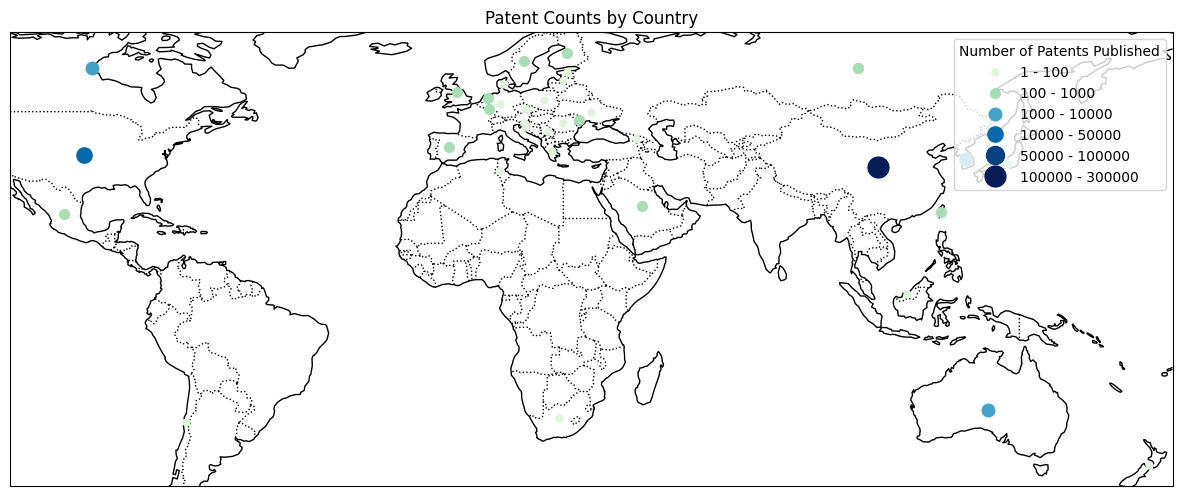

In [ ]:
# Set up colors, size limits, and marker sizes for visualization
colors = ['#e0f3db', '#a8ddb5', '#43a2ca', '#0868ac', '#084081', '#081d58']
size_limits = [1, 100, 1000, 10000, 50000, 100000, 300000]
marker_sizes = [5, 7, 9,11, 13, 15]  # marker sizes

# Initialize Cartopy map
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot each country based on patent count
for index, row in country_counts.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    patent_count = row['number_patents']

    # Determine size and color for each point based on patent count
    if not pd.isna(lat) and not pd.isna(lon):
        # Find the appropriate index based on size_limits
        ind = max([i for i, val in enumerate(size_limits) if patent_count >= val], default=0)
        color = colors[ind]
        markersize = marker_sizes[ind]  # Adjust marker size based on size_limits

        ax.plot(lon, lat, marker='o', markersize=markersize, color=color,
                transform=ccrs.PlateCarree())

# Create custom legend entries matching the colors and sizes
legend_entries = []
for i in range(len(size_limits) - 1):
    label = f"{size_limits[i]} - {size_limits[i+1]}"
    legend_entry = mlines.Line2D([], [], color=colors[i], marker='o', linestyle='None',
                                 markersize=marker_sizes[i], label=label)
    legend_entries.append(legend_entry)

# Add the custom legend to the plot
plt.legend(handles=legend_entries, title="Number of Patents Published", loc='upper right')

plt.title("Patent Counts by Country")
plt.show()

### CPC Code

Replace the `cpc_code` with patent classifications:

- **A** - Human necessities
- **B** - Performing operations; transporting
- **C** - Chemistry; metallurgy
- **D** - Textiles; paper
- **E** - Fixed constructions
- **F** - Mechanical engineering; lighting; heating; weapons; blasting engines or pumps
- **G** - Physics
- **H** - Electricity
- **Y** - General tagging

Source: [USPTO CPC Classification](https://www.uspto.gov/web/patents/classification/cpc/html/cpc.html)

In [ ]:
# Example dictionary mapping CPC section abbreviations to descriptions
cpc_sections = {
    'A': 'Human necessities',
    'B': 'Performing operations; transporting',
    'C': 'Chemistry; metallurgy',
    'D': 'Textiles; paper',
    'E': 'Fixed constructions',
    'F': 'Mechanical engineering', #lighting; heating; weapons; blasting engines or pumps',
    'G': 'Physics',
    'H': 'Electricity',
    'Y': 'General tagging'
}


# Function to replace the cpc_code based on the first letter of the CPC code
def replace_cpc_code(code):
    section_letter = code[0]  # Get the first letter of the cpc_code
    return cpc_sections.get(section_letter, code)  # Replace with description if found, otherwise keep original

# Apply the replacement function to the 'cpc_code' column
data_cleaned['cpc_code'] = data_cleaned['cpc_code'].apply(replace_cpc_code)
data_cleaned = data_cleaned.rename(columns={'cpc_code': 'cpc'})

# Display the modified DataFrame
data_cleaned.head(10)

,publication_number,application_number,country_code,title,abstract,publication_date,inventor,cpc,title_cleaned,abstract_cleaned
0,CN-117138249-A,CN-202311356270-A,CN,一种石墨烯光疗面罩,"The application provides a graphene phototherapy mask, and relates to the technical field of pho...",2023-12-01,"'LI HAITAO', 'CAO WENQIANG'",Human necessities,石墨 烯 光疗 面罩,application graphene phototherapy mask relate technical field phototherapy device graphene photo...
1,CN-117151396-A,CN-202311109834-A,CN,"Distributed economic scheduling method for wind, solar, biogas and hydrogen multi-energy multi-m...","The invention discloses a distributed economic dispatching method of a wind, solar and methane h...",2023-12-01,"'HU PENGFEI', 'LI ZIMENG'",Physics,distribute economic scheduling method wind solar biogas hydrogen multienergy multimicrogrid,disclose distribute economic dispatching method wind solar methane hydrogen multienergy multimic...
2,CN-117141530-A,CN-202310980795-A,CN,氢能源动力轨道车辆组,"The invention discloses a hydrogen energy power rail vehicle group, which comprises a power vehi...",2023-12-01,"'XIE BO', 'ZHANG SHUIQING', 'ZHOU FEI', 'LIU YONG', 'Zhou Houyi'",General tagging,氢 能源动力 轨道 车辆 组,disclose hydrogen energy power rail vehicle comprise power vehicle module equipment vehicle modu...
3,CN-117141244-A,CN-202311177651-A,CN,一种汽车太阳能充电系统、方法及新能源汽车,"The application discloses an automobile solar charging system, an automobile solar charging meth...",2023-12-01,'ZHAO PENGCHENG',Performing operations; transporting,汽车 太阳能 充电 系统 方法 新能源 汽车,application disclose automobile solar charging automobile solar charging method energy automobil...
4,CN-117146094-A,CN-202311272549-A,CN,一种水利水电管道连接装置,"The invention provides a water conservancy and hydropower pipeline connecting device, which effe...",2023-12-01,"'LYU SHUOSHUO', 'LI PANFENG', 'XU ZHENGWEI', 'WANG WEIBIN', 'ZHANG CHEN', 'ZHOU HAIYUN'",Mechanical engineering,水利水电 管道 连接 装置,water conservancy hydropower pipeline connect device effectively solve exist pipeline connect st...
5,CN-117147382-A,CN-202310985511-A,CN,Device for monitoring hydrogen atom crossing grain boundary diffusion by using SKPFM and testing...,The invention provides a device and a method for monitoring hydrogen atom crossing grain boundar...,2023-12-01,"'MA ZHAOXIANG', 'WANG CHENGXU', 'LIU ZHONGLI'",Physics,device monitor hydrogen atom cross grain boundary diffusion skpfm testing method,device method monitor hydrogen atom cross grain boundary diffusion skpfm relate technical field ...
6,CN-113344288-B,CN-202110717505-A,CN,Cascade hydropower station group water level prediction method and device and computer readable ...,"The invention discloses a cascade hydropower station group water level prediction method, a casc...",2023-12-01,NaN,Physics,cascade hydropower station water level prediction method device readable storage medium,disclose cascade hydropower station water level prediction method cascade hydropower station wat...
7,CN-117145103-A,CN-202310862194-A,CN,一种零碳或近零碳生态建筑,"The invention discloses a zero-carbon or near-zero-carbon ecological building, and relates to th...",2023-12-01,"'ZHAI HONGYUAN', 'ZHANG SIBEN', 'WU WEIYI', 'LIN XUANZUO', 'LYU LIN', 'MU LINSEN', 'LIN GUOHAI'",Fixed constructions,零碳 近 零碳 生态 建筑,disclose zerocarbon nearzerocarbon ecological building relate technical field energysave buildin...
8,CN-117153944-A,CN-202311209193-A,CN,"Heterojunction solar cell, preparation method thereof and photovoltaic module","The application provides a heterojunction solar cell, a preparation method thereof and a photovo...",2023-12-01,"'TONG HONGBO', 'JIN YUPENG'",Electricity,heterojunction solar cell preparation method photovoltaic module,application heterojunction solar cell preparation method photovoltaic module relate technical fi...
9,CN-116911695-B,CN-202311167289-A,CN,Flexible resource adequacy evaluation method and device,The invention relates to a flexible resource adequacy evaluation method and device of an electri...,2023-12

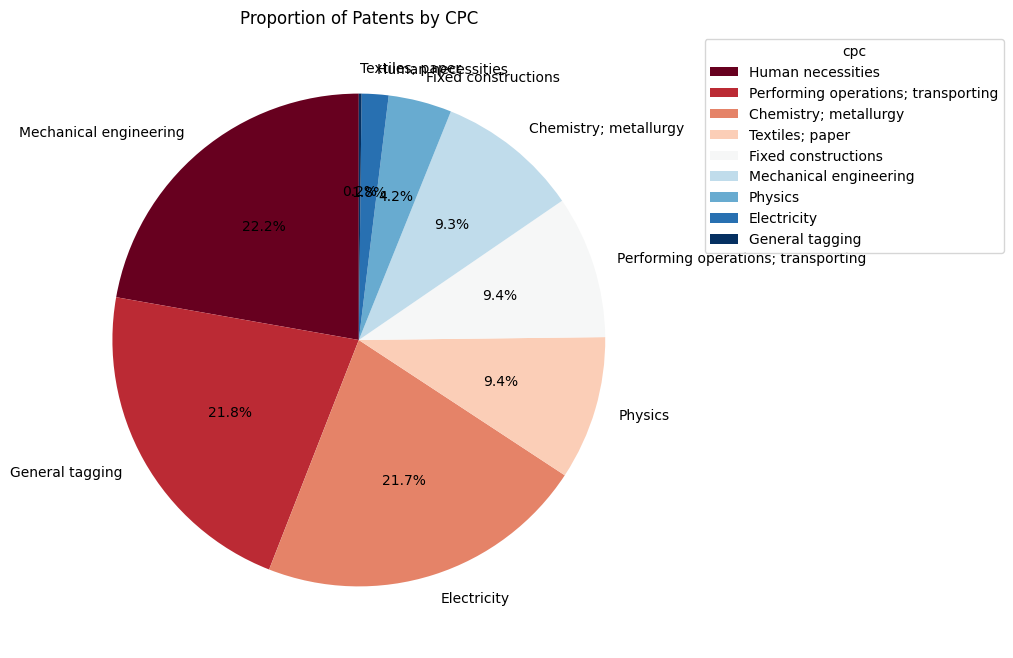

In [ ]:
# Replace the CDC codes in `data_cleaned['CDC']` with their descriptions
data_cleaned['cpc_mapped'] = data_cleaned['cpc'].map(cpc_sections).fillna(data_cleaned['cpc'])

# Get frequency count of each mapped CDC value
cpc_counts = data_cleaned['cpc_mapped'].value_counts()

# Plot pie chart with custom labels and colors
plt.figure(figsize=(8, 8))
cpc_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='RdBu', legend=True)

# Add a legend mapping letters to descriptions
plt.legend(cpc_sections.values(), title="cpc", bbox_to_anchor=(1.05, 1), loc='upper left')

# Set title and remove y-label for a clean look
plt.title('Proportion of Patents by CPC')
plt.ylabel('')  # Hide y-axis label for a cleaner appearance

plt.show()

### Time Series Analysis

In this section, we analyze trends in patent data by visualizing different variables over time. This includes:

- **Patent Counts Over Time**: A line chart showing the trend in the number of patents published annually.
- **CPC Counts Over Time**: A line chart displaying the frequency of different CPC codes over time, helping to identify shifts in technological focus.
- **Country Counts Over Time**: A stacked area chart illustrating the number of patents filed by each country over time, providing insights into regional patent activity trends.

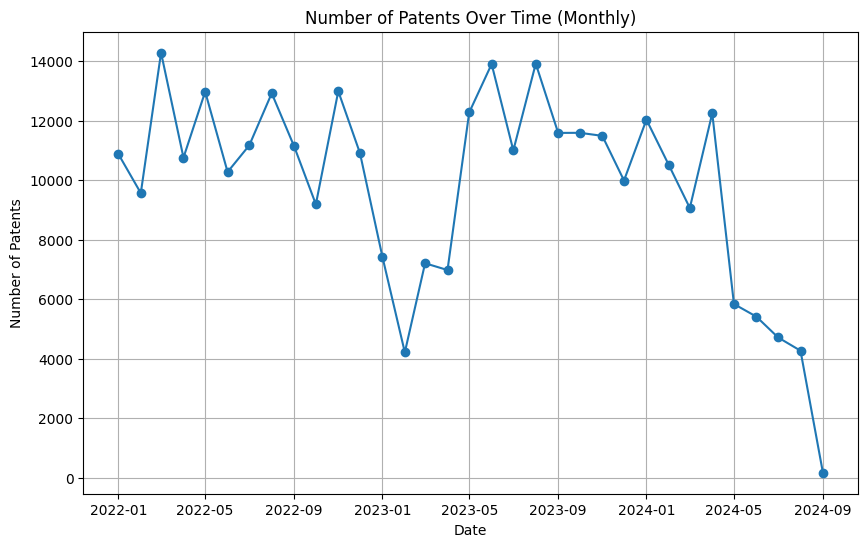

<Figure size 1200x800 with 0 Axes>

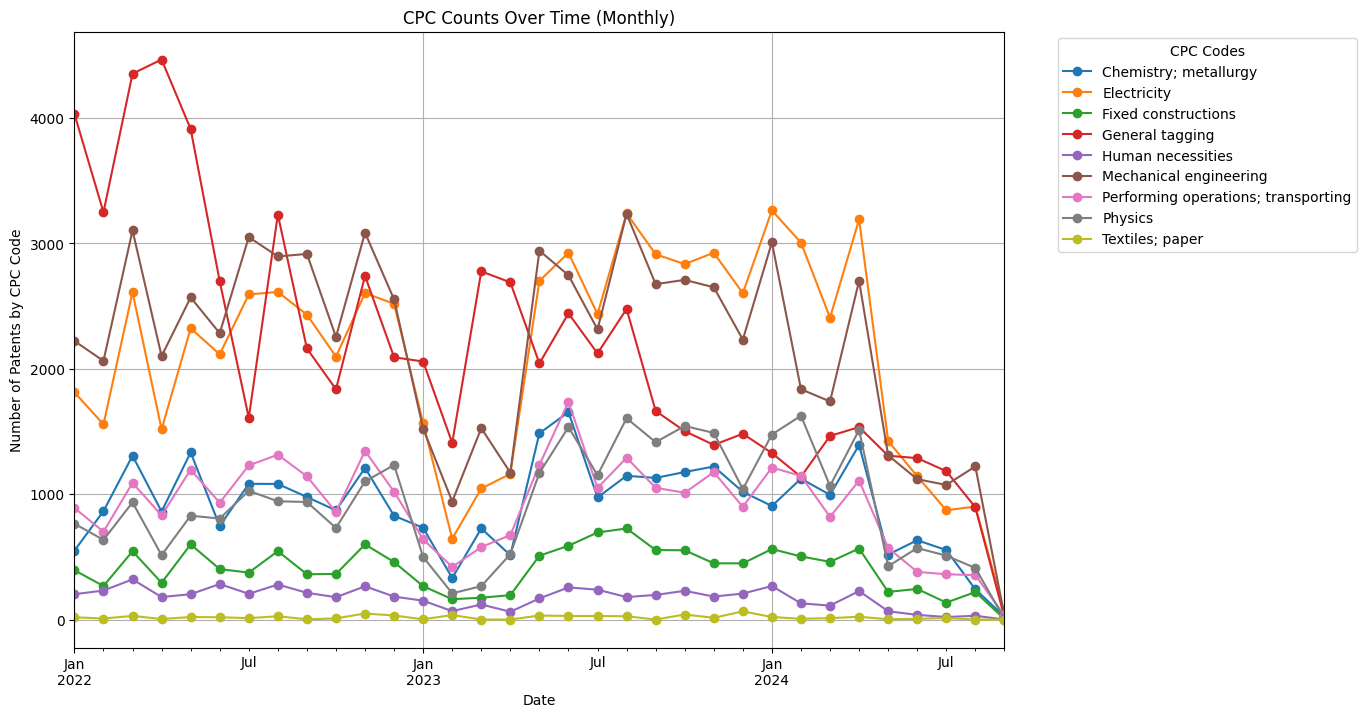

<Figure size 1200x800 with 0 Axes>

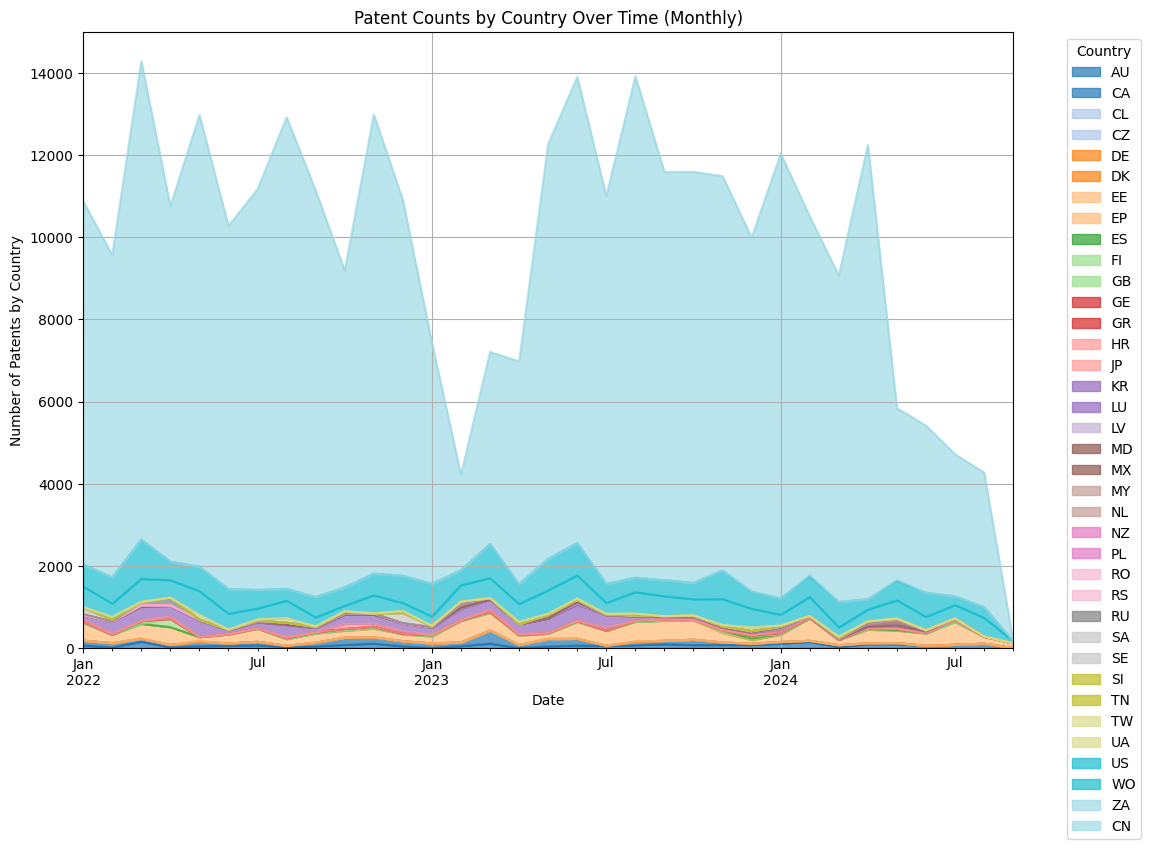

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'publication_date' column is in datetime format
data_cleaned['publication_date'] = pd.to_datetime(data_cleaned['publication_date'])
data_cleaned['year'] = data_cleaned['publication_date'].dt.year  # Extract year
data_cleaned['month'] = data_cleaned['publication_date'].dt.month  # Extract month

### 1. Patent Counts Over Time (Monthly) ###
# Group by year and month, then count patents
patent_counts_monthly = data_cleaned.groupby(['year', 'month']).size()

# Reset index for plotting
patent_counts_monthly = patent_counts_monthly.reset_index(name='patent_count')
patent_counts_monthly['date'] = pd.to_datetime(patent_counts_monthly[['year', 'month']].assign(day=1))

plt.figure(figsize=(10, 6))
plt.plot(patent_counts_monthly['date'], patent_counts_monthly['patent_count'], marker='o')
plt.title('Number of Patents Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Patents')
plt.grid(True)
plt.show()

### 2. CPC Counts Over Time (Monthly) ###
# Group by year, month, and CPC code, then count occurrences
cpc_counts_monthly = data_cleaned.groupby(['year', 'month', 'cpc']).size().unstack(fill_value=0)

# Reset index and create a date column for better plotting
cpc_counts_monthly = cpc_counts_monthly.reset_index()
cpc_counts_monthly['date'] = pd.to_datetime(cpc_counts_monthly[['year', 'month']].assign(day=1)).values
cpc_counts_monthly.set_index('date', inplace=True)

plt.figure(figsize=(12, 8))
cpc_counts_monthly.drop(columns=['year', 'month']).plot(kind='line', marker='o', linewidth=1.5, figsize=(12, 8))
plt.title('CPC Counts Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Patents by CPC Code')
plt.legend(title='CPC Codes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### 3. Country Counts Over Time (Monthly) ###
# Group by year, month, and country, then count occurrences
country_counts_monthly = data_cleaned.groupby(['year', 'month', 'country_code']).size().unstack(fill_value=0)

# Reset index and create a date column
country_counts_monthly = country_counts_monthly.reset_index()
country_counts_monthly['date'] = pd.to_datetime(country_counts_monthly[['year', 'month']].assign(day=1)).values
country_counts_monthly.set_index('date', inplace=True)

# Move 'CN' column to the end of the DataFrame for better visualization
cols = [col for col in country_counts_monthly.columns if col not in ['year', 'month', 'CN']] + ['CN']
country_counts_reordered = country_counts_monthly[cols]

# Plot with 'CN' as the last element in the legend
plt.figure(figsize=(12, 8))
country_counts_reordered.plot(kind='area', stacked=True, alpha=0.7, figsize=(12, 8), cmap='tab20')
plt.title('Patent Counts by Country Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Patents by Country')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Number of Patents Over Time (Monthly)
- The number of patents shows fluctuations over time, with some peaks and troughs.
- High patent counts are observed in early 2022 and mid-2023, reaching above 14,000 patents.
- A noticeable drop in patent counts towards the end of the time period, around mid to late 2024.
- The periodic rises and drops might indicate seasonal patterns or the impact of external factors, e.g. policy changes or market conditions affecting patent filings.

#### CPC Counts Over Time (Monthly)
- Some CPC categories, like *Mechanical Engineering; Lighting; Heating, Weapons; Blasting Engines or Pumps* and *Electricity*, consistently show higher patent counts. The patent data has a focus on green technologies, thus does not reflect all patents filed.
- Categories fluctuate month-to-month.
- Categories like *Textiles; Paper*, *Fixed Constructions*, and *General Tagging* remain relatively low in patent counts over time.
-*Electricity* and *Mechanical Engineering*, show upward trends, which may suggest increasing interest or innovation in these fields.

#### Patent Counts by Country Over Time (Monthly)
- China appears to have a significantly higher number of patents than other countries throughout the entire period.
- Other countries contribute comparatively small numbers of patents over time, indicating a stable but low-level patent activity.
- Except for the significant frop in February 2023 of patents filed from China, the numbers fluctuate on a month-to-month basis for all countries. The plot also shows a downward trend towards the end of 2024, indicating a potential decline in patent activity in this period.


### Overall

- sentiment analysis: sentiment, subjectivity
- text length, number of tokens
- most common words
- word cloud
- publication date
- inventor
